In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass

In [2]:
mods = pd.read_csv("full_projects/PXD022545_modifications.csv")
mods.head()

/tmp/ipykernel_565325/2060022845.py:1: DtypeWarning: Columns (13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  mods = pd.read_csv("full_projects/PXD022545_modifications.csv")


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,protein,uniprot_id,unexpected_modification,position,ionbot_match_id,#PSMs,Accession,spectrum_file,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes
0,0,0,0,1433B_HUMAN,P31946,[35]oxidation[M],24,0_1988_1,2,22545,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN
1,1,1,1,1433B_HUMAN,P31946,[35]oxidation[M],24,0_6003_1,2,22545,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN
2,2,2,2,1433B_HUMAN,P31946,[35]oxidation[M],28,0_16227_1,3,22545,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN
3,3,3,3,1433B_HUMAN,P31946,[35]oxidation[M],28,0_1988_1,3,22545,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN
4,4,4,4,1433B_HUMAN,P31946,[35]oxidation[M],28,0_5771_1,3,22545,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN


In [3]:
mods['Oxidant treatment'] = mods['Oxidant treatment'].fillna('None')

In [4]:
#Number of modified proteins per treatment
n_of_proteins = mods.groupby("Oxidant treatment")["protein"].count()
n_of_proteins = n_of_proteins.to_frame().reset_index()
n_of_proteins

,Oxidant treatment,protein
0,H2O2,21046
1,None,42330


In [5]:
g1 = mods.groupby(["Oxidant treatment"]).count()
g1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,protein,uniprot_id,unexpected_modification,position,ionbot_match_id,#PSMs,Accession,spectrum_file,Organism,Cell line,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes
Oxidant treatment,,,,,,,,,,,,,,,,,,,
H2O2,21046,21046,21046,21046,21046,21046,21046,21046,21046,21046,21046,21046,21046,21046,0,14670,21046,13059,0
None,42330,42330,42330,42330,42330,42330,42330,42330,42330,42330,42330,42330,42330,42330,0,42330,42330,42330,0


In [6]:
#How many times the same modification was found across the three replicates per treatment
g = mods.groupby(["protein", "unexpected_modification", "position", "Oxidant treatment"]).count()
g

Unnamed: 0.2  \
protein        unexpected_modification  position Oxidant treatment                 
1433B_HUMAN    [127]Fluoro[A]           90       H2O2                          1   
               [1870]Cation:Fe:III:[E]  33       None                          1   
               [1910]Cation:Al:III:[D]  98       H2O2                          1   
               [21]Phospho[C]           96       None                          1   
               [21]Phospho[D]           94       None                          1   
...                                                                          ...   
sp|THIO_HUMAN| [4]carbamidomethyl[C]    72       None                          1   
               [6]Carboxymethyl[C]      72       H2O2                          3   
                                                 None                          3   
               [6]Carboxymethyl[N-TERM] 72       None                          3   
               [952]Cation:Fe:II:[E]    12       H2O2                          1   

                                                                    Unnamed: 0.1  \
protein        unexpected_modification  position Oxidant treatment                 
1433B_HUMAN    [127]Fluoro[A]           90       H2O2                          1   
               [1870]Cation:Fe:III:[E]  33       None                          1   
               [1910]Cation:Al:III:[D]  98       H2O2                          1   
               [21]Phospho[C]           96       None                          1   
               [21]Phospho[D]           94       None                          1   
...                                                                          ...   
sp|THIO_HUMAN| [4]carbamidomethyl[C]    72       None                          1   
               [6]Carboxymethyl[C]      72       H2O2                          3   
                                                 None                          3   
               [6]Carboxymethyl[N-TERM] 72       None                          3   
               [952]Cation:Fe:II:[E]    12       H2O2                          1   

                                                                    Unnamed: 0  \
protein        unexpected_modification  position Oxidant treatment               
1433B_HUMAN    [127]Fluoro[A]           90       H2O2                        1   
               [1870]Cation:Fe:III:[E]  33       None                        1   
               [1910]Cation:Al:III:[D]  98       H2O2                        1   
               [21]Phospho[C]           96       None                        1   
               [21]Phospho[D]           94       None                        1   
...                                                                        ...   
sp|THIO_HUMAN| [4]carbamidomethyl[C]    72       None                        1   
               [6]Carboxymethyl[C]      72       H2O2                        3   
                                                 None                        3   
               [6]Carboxymethyl[N-TERM] 72       None                        3   
               [952]Cation:Fe:II:[E]    12       H2O2                        1   

                                                                    uniprot_id  \
protein        unexpected_modification  position Oxidant treatment               
1433B_HUMAN    [127]Fluoro[A]           90       H2O2                        1   
               [1870]Cation:Fe:III:[E]  33       None                        1   
               [1910]Cation:Al:III:[D]  98       H2O2                        1   
               [21]Phospho[C]           96       None                        1   
               [21]Phospho[D]           94       None                        1   
...                                                                        ...   
sp|THIO_HUMAN| [4]carbamidomethyl[C]    72       None                        1   
               [6]Carboxymethyl[C]      72       H2O2                        

In [7]:
#modifications that were found thrice for a specific treatment
gtripli = g[g["uniprot_id"] == 3]
gtripli = gtripli.reset_index()

In [8]:

db = pymass.Unimod()
modslist = []
for p in range(len(db.mods)):
    for pp in db.mods[p]['specificity']:
        if db.mods[p]['record_id'] in [35, 53, 129, 130, 205, 206, 275, 288, 318, 319, 335, 340, 342, 344, 345, 348, 349, 350, 351, 352, 354, 
        359, 360, 368, 378, 392, 401, 421, 425, 534, 540, 548, 569, 720, 721, 743, 743, 860, 936, 936, 937, 949, 1384, 1914, 1915, 1916, 1917, 1918, 
        1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929]:
            t = db.mods[p]['title']
            t = t.replace("[",":").replace("]",":")
            string = "[" + str(db.mods[p]['record_id']) + "]" + t + "[" + pp['site'] + "]"
            modslist.append(string)
modslist.append('[35]oxidation[M]')


In [9]:
gtripli_mods = gtripli['unexpected_modification']
modsbool = gtripli_mods.isin(modslist)
gtripli_ox = gtripli[modsbool]

#filter out contaminants
gtripli_ox = gtripli_ox[~gtripli_ox["protein"].str.startswith("sp|")]
gtripli_ox

,protein,unexpected_modification,position,Oxidant treatment,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,uniprot_id,ionbot_match_id,#PSMs,Accession,spectrum_file,Organism,Cell line,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes
0,1433B_HUMAN,[425]Dioxidation[M],220,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
1,1433B_HUMAN,[425]Dioxidation[M],220,None,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,0
6,1433E_HUMAN,[35]oxidation[M],23,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,1,0
7,1433E_HUMAN,[425]Dioxidation[M],221,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
8,1433E_HUMAN,[425]Dioxidation[M],221,None,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,YBOX3_HUMAN,[35]oxidation[M],267,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
2391,YLPM1_HUMAN,[35]oxidation[M],2077,None,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,0
2393,ZYX_HUMAN,[35]Oxidation[E],371,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
2394,ZYX_HUMAN,[35]oxidation[M],158,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,1,3,2,0


gtripli_ox: a list of modifications that were found in triplicate among the different treatments.
E.g. 1433E_Human was found to be dioxidated on position 220 in triplicate samples, in both treatments.
Now to find proteins that were oxidized under oxidative stress only.

In [10]:
gdiff = gtripli_ox.groupby("Oxidant treatment")["protein"].count().to_frame().reset_index()
#Amount of modified proteins that were found in all triplicates for one treatment but not the other
gdiff



,Oxidant treatment,protein
0,H2O2,498
1,None,932


In [11]:
proteins = pd.read_csv("full_projects/PXD022545_first_proteins.csv")
proteins.sort_values("protein_group_q-value", ascending = False).head()

/tmp/ipykernel_565325/165703347.py:1: DtypeWarning: Columns (17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  proteins = pd.read_csv("full_projects/PXD022545_first_proteins.csv")


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ionbot_match_id,is_shared_peptide,protein_group,protein_group_q-value,protein_group_PEP,protein,position_in_protein,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
91966,91966,91966,10943,0_4715_2,True,KRT85_HUMAN,0.650,1.0,KRT85_HUMAN,143-150,...,Human,ARPE-19,H2O2,10,NaN,NaN,Chronic,0.0,NaN,First
93221,93221,93221,12198,0_5707_1,True,KRT85_HUMAN,0.650,1.0,KRT85_HUMAN,143-150,...,Human,ARPE-19,H2O2,10,NaN,NaN,Chronic,0.0,NaN,First
81230,81230,81230,207,0_8220_1,True,SRSF8_HUMAN,0.648,1.0,SRSF8_HUMAN,18-25,...,Human,ARPE-19,H2O2,10,NaN,NaN,Chronic,0.0,NaN,First
92887,92887,92887,11864,0_5047_1,False,H37_HUMAN,0.644,1.0,H37_HUMAN,20-28,...,Human,ARPE-19,H2O2,10,NaN,NaN,Chronic,0.0,NaN,First
83546,83546,83546,2523,0_1367_2,False,H37_HUMAN,0.644,1.0,H37_HUMAN,29-38,...,Human,ARPE-19,H2O2,10,NaN,NaN,Chronic,0.0,NaN,First


In [12]:
proteins["Oxidant treatment"] = proteins["Oxidant treatment"].fillna("None")

In [13]:
#Amount of identified proteins per treatment
gprot = proteins.groupby("Oxidant treatment")["protein"].count()
gprot = gprot.reset_index()
gprot

,Oxidant treatment,protein
0,H2O2,42177
1,None,81023


In [14]:
#Ratio of oxidized proteins over all proteins for each treatment
quotient = gdiff["protein"] / gprot["protein"]
quotient = quotient.rename(index={0: "H2O2", 1: "No treatment"})
quotient

H2O2            0.011807
No treatment    0.011503
Name: protein, dtype: float64

A slight increase in the ratio of oxidized proteins is seen. 

In [15]:
gtripli_ox

,protein,unexpected_modification,position,Oxidant treatment,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,uniprot_id,ionbot_match_id,#PSMs,Accession,spectrum_file,Organism,Cell line,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes
0,1433B_HUMAN,[425]Dioxidation[M],220,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
1,1433B_HUMAN,[425]Dioxidation[M],220,None,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,0
6,1433E_HUMAN,[35]oxidation[M],23,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,1,0
7,1433E_HUMAN,[425]Dioxidation[M],221,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
8,1433E_HUMAN,[425]Dioxidation[M],221,None,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,YBOX3_HUMAN,[35]oxidation[M],267,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
2391,YLPM1_HUMAN,[35]oxidation[M],2077,None,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,0
2393,ZYX_HUMAN,[35]Oxidation[E],371,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
2394,ZYX_HUMAN,[35]oxidation[M],158,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,1,3,2,0


In [16]:
diffpr = gtripli_ox.groupby(["protein", "unexpected_modification", "position"]).count().reset_index()
diffpr = diffpr[diffpr["Accession"]==1]
diffpr

,protein,unexpected_modification,position,Oxidant treatment,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,uniprot_id,ionbot_match_id,#PSMs,Accession,spectrum_file,Organism,Cell line,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes
1,1433E_HUMAN,[35]oxidation[M],23,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1433G_HUMAN,[35]oxidation[M],165,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,2AAA_HUMAN,[35]oxidation[M],291,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,2AAA_HUMAN,[35]oxidation[M],427,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11,2AAA_HUMAN,[35]oxidation[M],499,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,XRCC5_HUMAN,[35]oxidation[M],515,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1296,XRCC5_HUMAN,[35]oxidation[M],633,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1297,YBOX3_HUMAN,[35]oxidation[M],267,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1298,YLPM1_HUMAN,[35]oxidation[M],2077,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [17]:
#Series of proteins that are differentially modified between two treatments
diffmodprot = diffpr["protein"]

In [18]:
unique_mods = gtripli_ox[gtripli_ox["protein"].isin(diffmodprot)]
unique_Nonemods = unique_mods[unique_mods["Oxidant treatment"] == "None"]
unique_H2O2mods = unique_mods[unique_mods["Oxidant treatment"] == "H2O2"]
#Proteins with modifications that were found thrice in H2O2 treatment replicates, but not in untreated replicates
unique_H2O2mods 

,protein,unexpected_modification,position,Oxidant treatment,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,uniprot_id,ionbot_match_id,#PSMs,Accession,spectrum_file,Organism,Cell line,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes
6,1433E_HUMAN,[35]oxidation[M],23,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,1,0
7,1433E_HUMAN,[425]Dioxidation[M],221,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
14,1433G_HUMAN,[35]oxidation[M],165,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
15,1433G_HUMAN,[425]Dioxidation[M],223,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
30,2AAA_HUMAN,[35]oxidation[M],427,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,WBP2_HUMAN,[35]oxidation[M],126,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,3,3,1,0
2384,XRCC5_HUMAN,[35]oxidation[M],389,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,3,3,2,0
2389,YBOX3_HUMAN,[35]oxidation[M],267,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0
2393,ZYX_HUMAN,[35]Oxidation[E],371,H2O2,3,3,3,3,3,3,3,3,3,3,3,0,2,3,2,0


In [19]:
H2O2mods = unique_H2O2mods["unexpected_modification"]
H2O2counts = H2O2mods.value_counts().rename_axis('modification').reset_index(name = 'H2O2counts')
Nonemods = unique_Nonemods["unexpected_modification"]
Nonecounts = Nonemods.value_counts().rename_axis('modification').reset_index(name = 'Nonecounts')
modcounts = pd.merge(Nonecounts,H2O2counts,how="outer")
modcounts["Nonecounts"] = (modcounts["Nonecounts"]/81023*100000) 
modcounts["H2O2counts"] = (modcounts["H2O2counts"]/42177*100000)
modcounts = modcounts.dropna()
modcounts


,modification,Nonecounts,H2O2counts
0,[35]oxidation[M],882.465473,848.803850
1,[425]Dioxidation[M],69.116177,99.580340
2,[345]Trioxidation[C],25.918566,18.967684
3,[1384]Homocysteic_acid[M],12.342174,21.338644
6,[35]Oxidation[I],9.873740,2.370960
7,[35]Oxidation[P],8.639522,4.741921
8,[35]Oxidation[D],8.639522,11.854802
10,[35]Oxidation[E],6.171087,9.483842
11,[35]Oxidation[G],4.936870,4.741921
13,[35]Oxidation[T],3.702652,7.112881


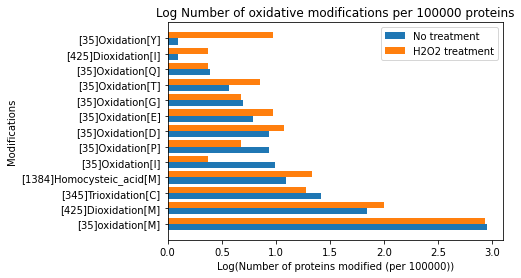

In [20]:
y = modcounts["modification"]
xnone = np.log10(modcounts["Nonecounts"])
xH = np.log10(modcounts["H2O2counts"])
y_axis = np.arange(len(y))

plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'H2O2 treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of proteins modified (per 100000))")
plt.title("Log Number of oxidative modifications per 100000 proteins")
plt.rcParams["figure.figsize"] = (10,5)
plt.legend()
plt.show()


In [21]:
H2O2counts

,modification,H2O2counts
0,[35]oxidation[M],358
1,[425]Dioxidation[M],42
2,[1384]Homocysteic_acid[M],9
3,[345]Trioxidation[C],8
4,[35]Oxidation[D],5
5,[35]Oxidation[Y],4
6,[35]Oxidation[E],4
7,[35]Oxidation[T],3
8,[35]Oxidation[P],2
9,[35]Oxidation[G],2


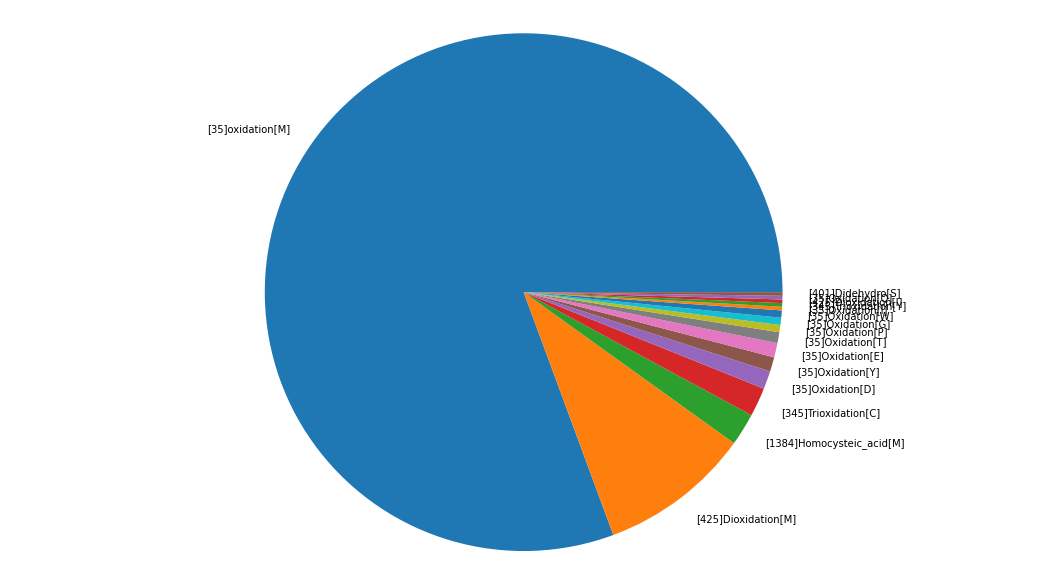

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie(H2O2counts['H2O2counts'], labels = H2O2counts['modification'])
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [23]:
modslistwithoutmOx = H2O2counts.drop(labels=0)
modslistwithoutmOx

,modification,H2O2counts
1,[425]Dioxidation[M],42
2,[1384]Homocysteic_acid[M],9
3,[345]Trioxidation[C],8
4,[35]Oxidation[D],5
5,[35]Oxidation[Y],4
6,[35]Oxidation[E],4
7,[35]Oxidation[T],3
8,[35]Oxidation[P],2
9,[35]Oxidation[G],2
10,[35]Oxidation[W],2


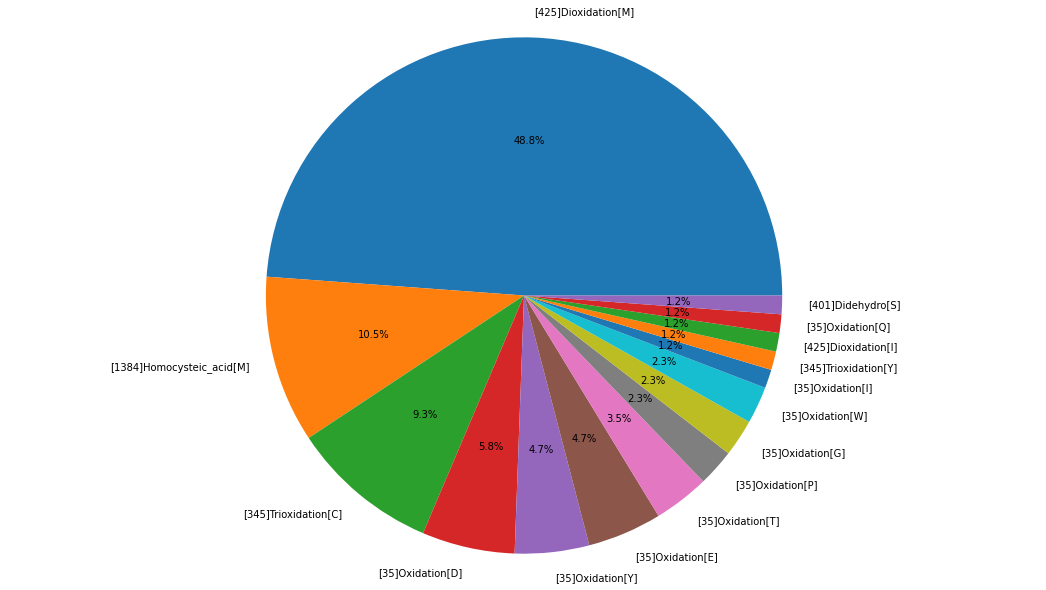

In [24]:
fig1, ax1 = plt.subplots()
ax1.pie(modslistwithoutmOx['H2O2counts'], labels = modslistwithoutmOx['modification'], autopct = '%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [25]:
H2O2counts['Amino acid modified'] = H2O2counts['modification'].str[-2]
H2O2counts


,modification,H2O2counts,Amino acid modified
0,[35]oxidation[M],358,M
1,[425]Dioxidation[M],42,M
2,[1384]Homocysteic_acid[M],9,M
3,[345]Trioxidation[C],8,C
4,[35]Oxidation[D],5,D
5,[35]Oxidation[Y],4,Y
6,[35]Oxidation[E],4,E
7,[35]Oxidation[T],3,T
8,[35]Oxidation[P],2,P
9,[35]Oxidation[G],2,G


In [26]:
modifiedAA_counts = H2O2counts.groupby(['Amino acid modified']).sum().reset_index()
modifiedAA_counts

,Amino acid modified,H2O2counts
0,C,8
1,D,5
2,E,4
3,G,2
4,I,2
5,M,409
6,P,2
7,Q,1
8,S,1
9,T,3


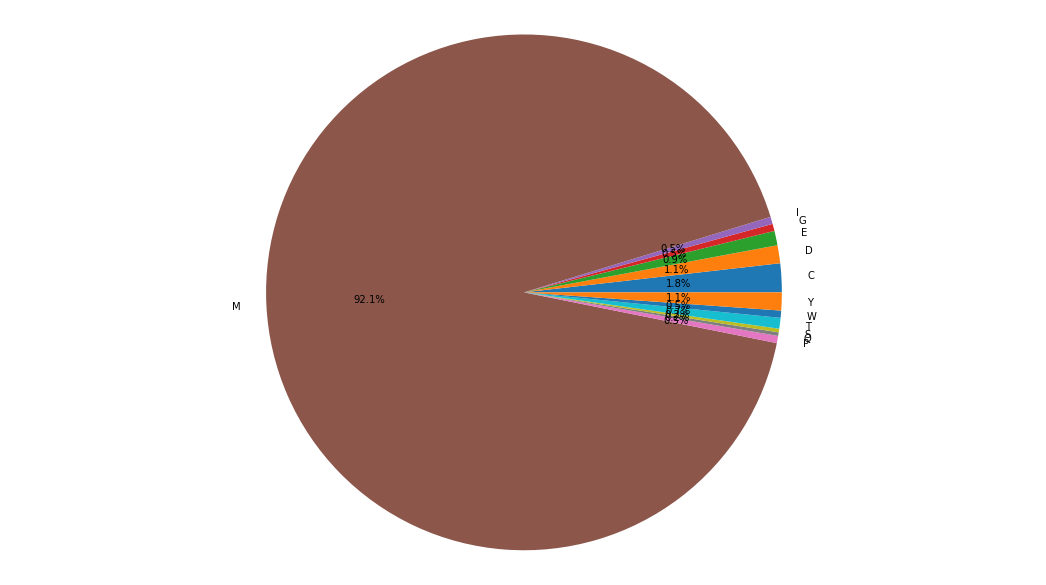

In [27]:
fig1, ax1 = plt.subplots()
ax1.pie(modifiedAA_counts['H2O2counts'], labels = modifiedAA_counts['Amino acid modified'], autopct='%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [28]:
modslistwithoutmOx['Amino acid modified'] = modslistwithoutmOx['modification'].str[-2]
modslistwithoutmOx

,modification,H2O2counts,Amino acid modified
1,[425]Dioxidation[M],42,M
2,[1384]Homocysteic_acid[M],9,M
3,[345]Trioxidation[C],8,C
4,[35]Oxidation[D],5,D
5,[35]Oxidation[Y],4,Y
6,[35]Oxidation[E],4,E
7,[35]Oxidation[T],3,T
8,[35]Oxidation[P],2,P
9,[35]Oxidation[G],2,G
10,[35]Oxidation[W],2,W


In [29]:
modifiedAA_countsnoM = modslistwithoutmOx.groupby(['Amino acid modified']).sum().reset_index()
modifiedAA_countsnoM

,Amino acid modified,H2O2counts
0,C,8
1,D,5
2,E,4
3,G,2
4,I,2
5,M,51
6,P,2
7,Q,1
8,S,1
9,T,3


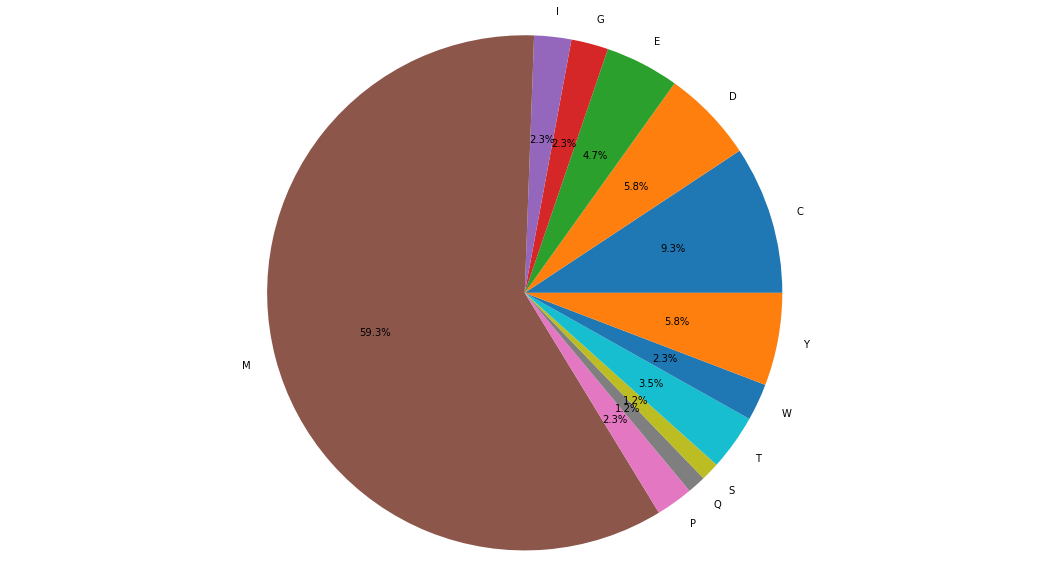

In [30]:
fig1, ax1 = plt.subplots()
ax1.pie(modifiedAA_countsnoM['H2O2counts'], labels = modifiedAA_countsnoM['Amino acid modified'], autopct='%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [31]:
first = pd.read_csv("/home/robbe/ionbot/full_projects/PXD022545_first.csv", index_col=0)
del first['Unnamed: 0']
del first['Unnamed: 0.1']
first.head()

/tmp/ipykernel_565325/3278789377.py:1: DtypeWarning: Columns (25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  first = pd.read_csv("/home/robbe/ionbot/full_projects/PXD022545_first.csv", index_col=0)


,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0_8_1,controllerType=0 controllerNumber=1 scan=10,10,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,790.34769,7903.4568,0.88133,2,EAADTER,EAADTER,...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN,First
1,0_7572_1,controllerType=0 controllerNumber=1 scan=10006,10006,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1911.78352,19117.8054,1163.81700,4,SEEAHAEDSVMDHHFR,SEEAHAEDSVMDHHFR,...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN,First
2,0_7573_4,controllerType=0 controllerNumber=1 scan=10007,10007,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,762.36667,7623.6603,1163.86404,2,GTFPDAR,GTFPDAR,...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN,First
3,0_7574_2,controllerType=0 controllerNumber=1 scan=10008,10008,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,939.45005,9394.4836,1163.91264,2,VMEYINR,VMEYINR,...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN,First
4,0_7575_1,controllerType=0 controllerNumber=1 scan=10010,10010,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,895.40507,8954.0354,1164.25452,2,ESFDGSVR,ESFDGSVR,...,Human,ARPE-19,NaN,0,NaN,0.0,0,0.0,NaN,First


In [32]:
first["Oxidant treatment"] = first["Oxidant treatment"].fillna("None")
first

,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0_8_1,controllerType=0 controllerNumber=1 scan=10,10,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,790.34769,7903.4568,0.88133,2,EAADTER,EAADTER,...,Human,ARPE-19,None,0,NaN,0.0,0,0.0,NaN,First
1,0_7572_1,controllerType=0 controllerNumber=1 scan=10006,10006,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1911.78352,19117.8054,1163.81700,4,SEEAHAEDSVMDHHFR,SEEAHAEDSVMDHHFR,...,Human,ARPE-19,None,0,NaN,0.0,0,0.0,NaN,First
2,0_7573_4,controllerType=0 controllerNumber=1 scan=10007,10007,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,762.36667,7623.6603,1163.86404,2,GTFPDAR,GTFPDAR,...,Human,ARPE-19,None,0,NaN,0.0,0,0.0,NaN,First
3,0_7574_2,controllerType=0 controllerNumber=1 scan=10008,10008,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,939.45005,9394.4836,1163.91264,2,VMEYINR,VMEYINR,...,Human,ARPE-19,None,0,NaN,0.0,0,0.0,NaN,First
4,0_7575_1,controllerType=0 controllerNumber=1 scan=10010,10010,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,895.40507,8954.0354,1164.25452,2,ESFDGSVR,ESFDGSVR,...,Human,ARPE-19,None,0,NaN,0.0,0,0.0,NaN,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110364,0_7389_1,controllerType=0 controllerNumber=1 scan=9974,9974,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,828.34879,8274.3886,1214.16228,2,ATIPSPDK,ATIPSPDK,...,Human,ARPE-19,H2O2,10,NaN,0.0,Chronic,NaN,NaN,First
110365,0_7391_2,controllerType=0 controllerNumber=1 scan=9976,9976,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,861.44669,8614.4434,1214.25954,2,ETGVDITK,ETGVDITK,...,Human,ARPE-19,H2O2,10,NaN,0.0,Chronic,NaN,NaN,First
110366,0_7401_2,controllerType=0 controllerNumber=1 scan=9990,9990,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,1236.64878,12366.4622,1216.01316,2,HIIPAANTGESK,HIIPAANTGESK,...,Human,ARPE-19,H2O2,10,NaN,0.0,Chronic,NaN,NaN,First
110367,0_7408_1,controllerType=0 controllerNumber=1 scan=9998,9998,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,899.50913,8995.0760,1216.70676,2,GSAITGPVAK,GSAITGPVAK,...,Human,ARPE-19,H2O2,10,NaN,0.0,Chronic,NaN,NaN,First


In [33]:
#spectrum count?
g = first.groupby(["matched_peptide", "modifications", "Oxidant treatment", "spectrum_file"])['scan'].count().to_frame().reset_index()
g

,matched_peptide,modifications,Oxidant treatment,spectrum_file,scan
0,AAAAAAAGDSDSWDADAFSVEDPVRK,12|[5]Carbamyl[S],None,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
1,AAAAADGPPAADGEDGQDPHSK,4|semi_tryptic,None,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
2,AAAAAEQQQFYIIIGNIISPDNVVR,6|[299]Carboxy[E],None,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
3,AAAAAWEEPSSGNGTAR,13|[7]Deamidated[N],None,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
4,AAAAAWEEPSSGNGTAR,17|[7]Deamidated[R],None,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
...,...,...,...,...,...
28257,YYTSASGDEMVSIK,10|[35]oxidation[M],H2O2,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,2
28258,YYTSASGDEMVSIK,10|[35]oxidation[M],H2O2,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,2
28259,YYTSASGDEMVSIK,10|[35]oxidation[M],None,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,3
28260,YYTSASGDEMVSIK,10|[35]oxidation[M],None,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,2


In [34]:
#peptidoforms found thrice for one or both treatments
g2 = g.groupby(["matched_peptide", "modifications", "Oxidant treatment"])['spectrum_file'].count().to_frame().reset_index()
g2 = g2.rename(columns={"spectrum_file": "counts"})
thrice = g2[g2['counts'] == 3]
thrice

,matched_peptide,modifications,Oxidant treatment,counts
8,AAAIEAMK,7|[35]oxidation[M],H2O2,3
9,AAAIEAMK,7|[35]oxidation[M],None,3
17,AAAPQAWAGPMEEPPQAQAPPR,11|[35]oxidation[M],None,3
20,AADDTWEPFASGK,4|[34]Methyl[D],None,3
21,AADINGDITATR,5|[7]Deamidated[N],None,3
...,...,...,...,...
18296,YWPQEAMEYAVHVICNSEDIR,7|Gly->Met[G],H2O2,3
18297,YWPQEAMEYAVHVICNSEDIR,7|Gly->Met[G],None,3
18301,YYDVMSDEEIER,5|[35]oxidation[M],None,3
18306,YYTSASGDEMVSIK,10|[35]oxidation[M],H2O2,3


In [35]:
thrice_exp = thrice.explode("modifications")
thrice_exp

,matched_peptide,modifications,Oxidant treatment,counts
8,AAAIEAMK,7|[35]oxidation[M],H2O2,3
9,AAAIEAMK,7|[35]oxidation[M],None,3
17,AAAPQAWAGPMEEPPQAQAPPR,11|[35]oxidation[M],None,3
20,AADDTWEPFASGK,4|[34]Methyl[D],None,3
21,AADINGDITATR,5|[7]Deamidated[N],None,3
...,...,...,...,...
18296,YWPQEAMEYAVHVICNSEDIR,7|Gly->Met[G],H2O2,3
18297,YWPQEAMEYAVHVICNSEDIR,7|Gly->Met[G],None,3
18301,YYDVMSDEEIER,5|[35]oxidation[M],None,3
18306,YYTSASGDEMVSIK,10|[35]oxidation[M],H2O2,3


In [36]:
thrice = thrice.fillna("None")

In [37]:
from cmath import nan


def get_position(str):
    lijst = str.split("|")
    return lijst[0]
def get_modification(str):
    lijst = str.split("|")
    if len(lijst) <= 1:
        return nan
    else:
        return lijst[1]



In [38]:
thrice['position'] = thrice['modifications'].apply(get_position)
thrice['Modification'] = thrice['modifications'].apply(get_modification)
thrice.head()

,matched_peptide,modifications,Oxidant treatment,counts,position,Modification
8,AAAIEAMK,7|[35]oxidation[M],H2O2,3,7,[35]oxidation[M]
9,AAAIEAMK,7|[35]oxidation[M],None,3,7,[35]oxidation[M]
17,AAAPQAWAGPMEEPPQAQAPPR,11|[35]oxidation[M],None,3,11,[35]oxidation[M]
20,AADDTWEPFASGK,4|[34]Methyl[D],None,3,4,[34]Methyl[D]
21,AADINGDITATR,5|[7]Deamidated[N],None,3,5,[7]Deamidated[N]


In [39]:
thricemods = thrice['Modification']
modsbool = thricemods.isin(modslist)
thrice_ox = thrice[modsbool]
thrice_ox.head()

,matched_peptide,modifications,Oxidant treatment,counts,position,Modification
8,AAAIEAMK,7|[35]oxidation[M],H2O2,3,7,[35]oxidation[M]
9,AAAIEAMK,7|[35]oxidation[M],None,3,7,[35]oxidation[M]
17,AAAPQAWAGPMEEPPQAQAPPR,11|[35]oxidation[M],None,3,11,[35]oxidation[M]
22,AADINGDITATREEFTAFIHPEEFEHMK,27|[35]oxidation[M],H2O2,3,27,[35]oxidation[M]
23,AADINGDITATREEFTAFIHPEEFEHMK,27|[35]oxidation[M],None,3,27,[35]oxidation[M]


In [40]:
#peptides that were differentially modified between the two treatments
diffpep = thrice_ox.groupby(["matched_peptide", "modifications"]).count().reset_index()
diffpep = diffpep[diffpep["counts"]==1]
diffpep

,matched_peptide,modifications,Oxidant treatment,counts,position,Modification
1,AAAPQAWAGPMEEPPQAQAPPR,11|[35]oxidation[M],1,1,1,1
5,AAHSEGNTTAGIDMR,14|[35]oxidation[M],1,1,1,1
6,AAIAGGTTMIIDHVVPEPESSITEAYEK,9|[35]oxidation[M],1,1,1,1
8,AAIMESQGQQQEER,4|[35]oxidation[M],1,1,1,1
10,AAMDNSEIAGEK,3|[35]oxidation[M],1,1,1,1
...,...,...,...,...,...,...
1738,YTEHSTVGIAQQWDQIDQIGMR,21|[35]oxidation[M],1,1,1,1
1741,YTPTQQGNMQVIVTYGGDPIPK,9|[35]oxidation[M],1,1,1,1
1742,YTSIMIR,5|[35]oxidation[M],1,1,1,1
1744,YWDVPPPGFEHITPMQYK,15|[35]oxidation[M],1,1,1,1


In [41]:
#Series of proteins that are differentially modified between two treatments
diffmodpep = diffpep["matched_peptide"]
diffmodmod = diffpep["modifications"]
#filter df for only these proteins
unique_mods = thrice_ox[(thrice_ox["matched_peptide"].isin(diffmodpep)) & (thrice_ox["modifications"].isin(diffmodmod))]
unique_mods

,matched_peptide,modifications,Oxidant treatment,counts,position,Modification
17,AAAPQAWAGPMEEPPQAQAPPR,11|[35]oxidation[M],None,3,11,[35]oxidation[M]
60,AAHSEGNTTAGIDMR,14|[35]oxidation[M],H2O2,3,14,[35]oxidation[M]
68,AAIAGGTTMIIDHVVPEPESSITEAYEK,9|[35]oxidation[M],None,3,9,[35]oxidation[M]
79,AAIMESQGQQQEER,4|[35]oxidation[M],None,3,4,[35]oxidation[M]
92,AAMDNSEIAGEK,3|[35]oxidation[M],None,3,3,[35]oxidation[M]
...,...,...,...,...,...,...
18189,YTEHSTVGIAQQWDQIDQIGMR,21|[35]oxidation[M],None,3,21,[35]oxidation[M]
18221,YTPTQQGNMQVIVTYGGDPIPK,9|[35]oxidation[M],None,3,9,[35]oxidation[M]
18229,YTSIMIR,5|[35]oxidation[M],None,3,5,[35]oxidation[M]
18280,YWDVPPPGFEHITPMQYK,15|[35]oxidation[M],None,3,15,[35]oxidation[M]


In [42]:
unique_Nonemods = unique_mods[unique_mods["Oxidant treatment"] == "None"]
unique_H2O2mods = unique_mods[unique_mods["Oxidant treatment"] == "H2O2"]
#Proteins with modifications that were found thrice in H2O2 treatment replicates, but not in untreated replicates
unique_H2O2mods 

,matched_peptide,modifications,Oxidant treatment,counts,position,Modification
60,AAHSEGNTTAGIDMR,14|[35]oxidation[M],H2O2,3,14,[35]oxidation[M]
150,ACANPAPGSVIIIENIR,2|[345]Trioxidation[C],H2O2,3,2,[345]Trioxidation[C]
243,ADIEMPFDPSK,5|[35]oxidation[M],H2O2,3,5,[35]oxidation[M]
246,ADIEMQIESITEEIAYIK,5|[35]oxidation[M],H2O2,3,5,[35]oxidation[M]
317,AEIMEISEDK,4|[35]oxidation[M],H2O2,3,4,[35]oxidation[M]
...,...,...,...,...,...,...
17748,YAIQMEQINGIIIHIESEIAQTR,5|[35]oxidation[M]|9|[7]Deamidated[N],H2O2,3,5,[35]oxidation[M]
17891,YFDMWGGDVAPFIEFIK,4|[35]oxidation[M],H2O2,3,4,[35]oxidation[M]
18081,YMPPEEGPYK,2|[35]oxidation[M],H2O2,3,2,[35]oxidation[M]
18082,YMPQNPHIIATK,2|[35]oxidation[M],H2O2,3,2,[35]oxidation[M]
